# Import necessary libraries

In [270]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [271]:
me = {'name': 'Iftekharul Haque Noor', 'reg': 2018831058}
print("Name:", me['name'])
print("Reg:", me['reg'])

Name: Iftekharul Haque Noor
Reg: 2018831058


# Load the dataset

In [272]:
bank_data = pd.read_csv('../input/bankdata/bank-data/bank-full.csv',delimiter=';')
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Visualize subscriptions

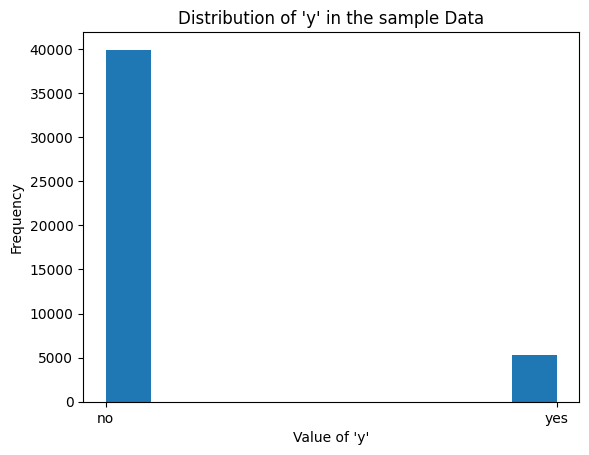

In [273]:
plt.hist(df['y'])
plt.xlabel("Value of 'y'")
plt.ylabel("Frequency")
plt.title("Distribution of 'y' in the sample Data")
plt.show()

# Dropping features with unknown variables

In [274]:
columns_to_drop = ['contact', 'month', 'default','poutcome']
bank_data = bank_data.drop(columns=columns_to_drop, axis=1)

# Finding the unique variables

In [275]:
bank_data['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

# Converting datatype to int for job variable 

In [276]:
lebelencoder = LabelEncoder()
bank_data['job'] = lebelencoder.fit_transform(bank_data['job'])
bank_data['job'].unique()

array([ 4,  9,  2,  1, 11,  5,  0,  7,  6, 10,  3,  8])

In [277]:
print(bank_data.dtypes)

age           int64
job           int64
marital      object
education    object
balance       int64
housing      object
loan         object
day           int64
duration      int64
campaign      int64
pdays         int64
previous      int64
y            object
dtype: object


In [278]:
bank_data.shape

(45211, 13)

# Removing unknown value of education

In [279]:
condition = bank_data['education'] != 'unknown'
bank_data = bank_data[condition]
bank_data.shape

(43354, 13)

# Converting datatype of all variable to int

In [280]:
for column in bank_data.columns:
    if bank_data[column].dtype == 'O':
        bank_data[column] = lebelencoder.fit_transform(bank_data[column])

In [281]:
print(bank_data.dtypes)

age          int64
job          int64
marital      int64
education    int64
balance      int64
housing      int64
loan         int64
day          int64
duration     int64
campaign     int64
pdays        int64
previous     int64
y            int64
dtype: object


# Separate the training feature and normalizing dataset

In [282]:
X = bank_data.drop("y", axis=1)
y = bank_data["y"]

In [283]:
for column in bank_data.columns[:-1]:
    bank_data[column] = (bank_data[column] - bank_data[column].mean()) / bank_data[column].std()
bank_data.head()

,age,job,marital,education,balance,housing,loan,day,duration,campaign,pdays,previous,y
0,1.636744,-0.099344,-0.273461,1.279349,0.259143,0.885078,-0.442943,-1.300937,0.010854,-0.574192,-0.412042,-0.250792,0
1,0.305817,1.435348,1.367684,-0.223602,-0.436271,0.885078,-0.442943,-1.300937,-0.415456,-0.574192,-0.412042,-0.250792,0
2,-0.739911,-0.713221,-0.273461,-0.223602,-0.445153,0.885078,2.257573,-1.300937,-0.706122,-0.574192,-0.412042,-0.250792,0
5,-0.549778,-0.099344,-0.273461,1.279349,-0.369822,0.885078,-0.442943,-1.300937,-0.461963,-0.574192,-0.412042,-0.250792,0
6,-1.215242,-0.099344,1.367684,1.279349,-0.298767,0.885078,2.257573,-1.300937,-0.159670,-0.574192,-0.412042,-0.250792,0


# Split the dataset

In [284]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


In [285]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [286]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34683 entries, 17205 to 39939
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        34683 non-null  int64
 1   job        34683 non-null  int64
 2   marital    34683 non-null  int64
 3   education  34683 non-null  int64
 4   balance    34683 non-null  int64
 5   housing    34683 non-null  int64
 6   loan       34683 non-null  int64
 7   day        34683 non-null  int64
 8   duration   34683 non-null  int64
 9   campaign   34683 non-null  int64
 10  pdays      34683 non-null  int64
 11  previous   34683 non-null  int64
dtypes: int64(12)
memory usage: 3.4 MB


# Define classification model

In [287]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(X, weights):
    return sigmoid(np.dot(X, weights))

In [288]:
def logistic_regression(X, y, learning_rate, epochs):
    X = np.c_[np.ones(X.shape[0]), X]
    weights = np.zeros(X.shape[1])

    for epoch in range(epochs):
        predictions = predict(X, weights)
        errors = y - predictions

        gradient = np.dot(X.T, errors)
        weights += learning_rate * gradient

    return weights

# Model Training

In [289]:
learning_rate = 0.001
epochs = 10000
weights = logistic_regression(X_train, y_train, learning_rate, epochs)

# Making prediction on the test data

In [290]:
X_test_bias = np.c_[np.ones(X_test.shape[0]), X_test]
y_pred_prob = predict(X_test_bias, weights)
y_pred = (y_pred_prob >= 0.5).astype(int)

# Evaluate the model


In [291]:
print("Accuracy: {:.3f}".format(accuracy_score(y_test, y_pred)))
print("Precision: {:.3f}".format(precision_score(y_test, y_pred)))
print("Recall: {:.3f}".format(recall_score(y_test, y_pred)))
print("F1-score: {:.3f}".format(f1_score(y_test, y_pred)))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.846
Precision: 0.191
Recall: 0.118
F1-score: 0.146
Confusion Matrix:
 [[7223  482]
 [ 852  114]]


# Vizualize the metrics

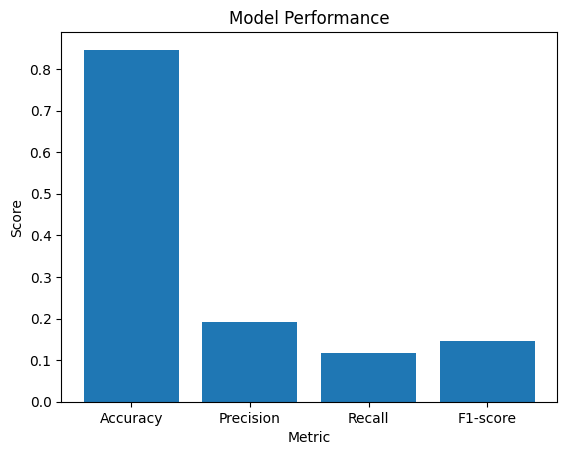

In [292]:
metrics = [accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']
plt.bar(labels, metrics)
plt.xlabel("Metric")
plt.ylabel("Score")
plt.title("Model Performance")
plt.show()

# Vizualize confusion matrix


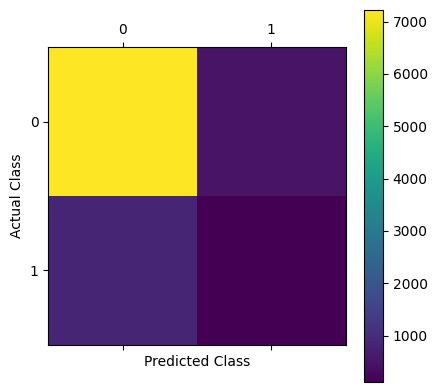

In [293]:

plt.matshow(confusion_matrix(y_test, y_pred), cmap="viridis")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.colorbar()
plt.show()